# 리뷰완료

이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 자동 미분과 선형 회귀 튜토리얼입니다.  

링크 : https://wikidocs.net/111472

# 1. 자동 미분

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.13.0'

In [3]:
w = tf.Variable(2.)

In [5]:
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>

In [6]:
def f(w):
  y = w**2 # 2**2 = y= 4
  z = 2*y + 5 #2*4+5=13 =z 
  return z

In [7]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


# 2. 자동 미분을 이용한 선형 회귀 구현

In [8]:
# 학습될 가중치 변수를 선언
W = tf.Variable(4.0)
b = tf.Variable(1.0)

In [9]:
@tf.function
def hypothesis(x):
  return W*x + b

In [10]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy()) #3.4*4+1=15, 5*4+1=21

[15. 21. 23. 25.]


In [11]:
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

In [13]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [14]:
optimizer = tf.optimizers.SGD(0.01)

In [17]:
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [W, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [W, b]))

  if i % 10 == 0:
    print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))

epoch :   0 | W의 값 : 10.6671 | b의 값 : 0.908 | cost : 1.062102
epoch :  10 | W의 값 : 10.6677 | b의 값 : 0.9039 | cost : 1.061931
epoch :  20 | W의 값 : 10.6683 | b의 값 : 0.8999 | cost : 1.061765
epoch :  30 | W의 값 : 10.6689 | b의 값 : 0.8961 | cost : 1.061616
epoch :  40 | W의 값 : 10.6695 | b의 값 : 0.8924 | cost : 1.061478
epoch :  50 | W의 값 : 10.6701 | b의 값 : 0.8889 | cost : 1.061354
epoch :  60 | W의 값 : 10.6706 | b의 값 : 0.8856 | cost : 1.061237
epoch :  70 | W의 값 : 10.6711 | b의 값 : 0.8824 | cost : 1.061131
epoch :  80 | W의 값 : 10.6716 | b의 값 : 0.8793 | cost : 1.061027
epoch :  90 | W의 값 : 10.6721 | b의 값 : 0.8763 | cost : 1.060937
epoch : 100 | W의 값 : 10.6725 | b의 값 : 0.8734 | cost : 1.060852
epoch : 110 | W의 값 : 10.6730 | b의 값 : 0.8707 | cost : 1.060777
epoch : 120 | W의 값 : 10.6734 | b의 값 : 0.8681 | cost : 1.060702
epoch : 130 | W의 값 : 10.6738 | b의 값 : 0.8655 | cost : 1.060640
epoch : 140 | W의 값 : 10.6742 | b의 값 : 0.8631 | cost : 1.060583
epoch : 150 | W의 값 : 10.6746 | b의 값 : 0.8608 | cost : 1.

In [18]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.21045  54.228344 59.567642 64.906944]


# 3. 케라스로 구현하는 선형 회귀

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [20]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 입력 x의 차원은 1, 출력 y의 차원도 1. 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 297ms/step - loss: 4275.2510 - mse: 4275.2510
Epoch 2/300
1/1 [==============================] - 0s 6ms/step - loss: 527.1484 - mse: 527.1484
Epoch 3/300
1/1 [==============================] - 0s 8ms/step - loss: 65.9709 - mse: 65.9709
Epoch 4/300
1/1 [==============================] - 0s 18ms/step - loss: 9.2250 - mse: 9.2250
Epoch 5/300
1/1 [==============================] - 0s 0s/step - loss: 2.2414 - mse: 2.2414
Epoch 6/300
1/1 [==============================] - 0s 15ms/step - loss: 1.3806 - mse: 1.3806
Epoch 7/300
1/1 [==============================] - 0s 0s/step - loss: 1.2733 - mse: 1.2733
Epoch 8/300
1/1 [==============================] - 0s 0s/step - loss: 1.2587 - mse: 1.2587
Epoch 9/300
1/1 [==============================] - 0s 18ms/step - loss: 1.2554 - mse: 1.2554
Epoch 10/300
1/1 [==============================] - 0s 6ms/step - loss: 1.2536 - mse: 1.2536
Epoch 11/300
1/1 [==============================] - 0s 15ms/step 

1/1 [==============================] - 0s 0s/step - loss: 1.1610 - mse: 1.1610
Epoch 90/300
1/1 [==============================] - 0s 15ms/step - loss: 1.1602 - mse: 1.1602
Epoch 91/300
1/1 [==============================] - 0s 0s/step - loss: 1.1593 - mse: 1.1593
Epoch 92/300
1/1 [==============================] - 0s 0s/step - loss: 1.1585 - mse: 1.1585
Epoch 93/300
1/1 [==============================] - 0s 17ms/step - loss: 1.1577 - mse: 1.1577
Epoch 94/300
1/1 [==============================] - 0s 0s/step - loss: 1.1569 - mse: 1.1569
Epoch 95/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1561 - mse: 1.1561
Epoch 96/300
1/1 [==============================] - 0s 0s/step - loss: 1.1553 - mse: 1.1553
Epoch 97/300
1/1 [==============================] - 0s 17ms/step - loss: 1.1545 - mse: 1.1545
Epoch 98/300
1/1 [==============================] - 0s 0s/step - loss: 1.1538 - mse: 1.1538
Epoch 99/300
1/1 [==============================] - 0s 14ms/step - loss: 1.1530 - mse:

1/1 [==============================] - 0s 17ms/step - loss: 1.1093 - mse: 1.1093
Epoch 177/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1089 - mse: 1.1089
Epoch 178/300
1/1 [==============================] - 0s 16ms/step - loss: 1.1085 - mse: 1.1085
Epoch 179/300
1/1 [==============================] - 0s 0s/step - loss: 1.1081 - mse: 1.1081
Epoch 180/300
1/1 [==============================] - 0s 0s/step - loss: 1.1077 - mse: 1.1077
Epoch 181/300
1/1 [==============================] - 0s 17ms/step - loss: 1.1073 - mse: 1.1073
Epoch 182/300
1/1 [==============================] - 0s 0s/step - loss: 1.1069 - mse: 1.1069
Epoch 183/300
1/1 [==============================] - 0s 16ms/step - loss: 1.1065 - mse: 1.1065
Epoch 184/300
1/1 [==============================] - 0s 0s/step - loss: 1.1061 - mse: 1.1061
Epoch 185/300
1/1 [==============================] - 0s 0s/step - loss: 1.1058 - mse: 1.1058
Epoch 186/300
1/1 [==============================] - 0s 17ms/step - loss: 1

1/1 [==============================] - 0s 0s/step - loss: 1.0840 - mse: 1.0840
Epoch 264/300
1/1 [==============================] - 0s 0s/step - loss: 1.0838 - mse: 1.0838
Epoch 265/300
1/1 [==============================] - 0s 17ms/step - loss: 1.0836 - mse: 1.0836
Epoch 266/300
1/1 [==============================] - 0s 0s/step - loss: 1.0834 - mse: 1.0834
Epoch 267/300
1/1 [==============================] - 0s 0s/step - loss: 1.0832 - mse: 1.0832
Epoch 268/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0830 - mse: 1.0830
Epoch 269/300
1/1 [==============================] - 0s 0s/step - loss: 1.0829 - mse: 1.0829
Epoch 270/300
1/1 [==============================] - 0s 13ms/step - loss: 1.0827 - mse: 1.0827
Epoch 271/300
1/1 [==============================] - 0s 911us/step - loss: 1.0825 - mse: 1.0825
Epoch 272/300
1/1 [==============================] - 0s 13ms/step - loss: 1.0823 - mse: 1.0823
Epoch 273/300
1/1 [==============================] - 0s 0s/step - loss: 1.

1/1 [==============================] - 0s 70ms/step


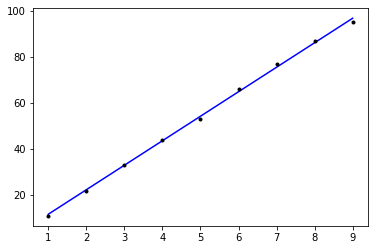

In [21]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')